# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats
from scipy.stats import norm
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ With a mean charge of 13 270 USD, and a standard deviation above 12 105 USD, these charges are not normally distributed and these stats do not offer a complete view into the data.

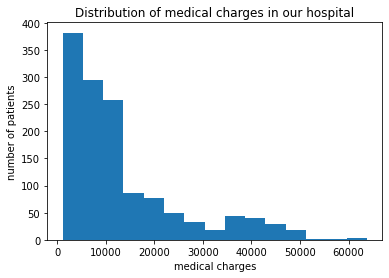

In [8]:
_ = plt.hist(medical['charges'], bins=15)
_ = plt.xlabel('medical charges')
_ = plt.ylabel('number of patients')
_ = plt.title('Distribution of medical charges in our hospital')
plt.show()

In [9]:
charges_mean = np.mean(medical['charges'])
charges_std = np.std(medical['charges'])

print(charges_mean)
print(charges_std)

13270.422265141257
12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Would suggest running a sampling distribution of the mean, then calculating a confidence interval.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since the admin is most concerned about an average below 12K, a one-sized confidence interval is most relevant. The one-sided interval at 95% is: 12 965 USD (well above the 12K threshold). The 99% confidence interval is 12 874 (also well above the 12K threshold), which should put the administration even more at ease.

In [10]:
def charge_sampler(n):
    return np.random.choice(medical['charges'], n)

In [14]:
#take samples
seed(88)
charge_sample = []
for i in range(120):
    charge_sample.append(np.mean(charge_sampler(75)))

In [15]:
print(len(charge_sample))
print(np.mean(charge_sample))
print(np.std(charge_sample))

120
13180.230142101667
1418.3874190028503


In [16]:
#confidence
est_mean = np.mean(charge_sample)
est_std = np.std(charge_sample)
se = est_std / (np.sqrt(120))

In [23]:
#95% confidence interval (one-sided 90% p-value from t-table https://www.statology.org/wp-content/uploads/2018/09/t_dist.png)
t = 1.658
conf = se * t
print(conf)

214.6786094969755


In [26]:
#99% confidence interval (one-sided 98% p-value from t-table https://www.statology.org/wp-content/uploads/2018/09/t_dist.png)
t = 2.358
conf = se * t
print(conf)

305.31493437507135


In [25]:
#95% confidence charge value
print(est_mean - conf)

12874.915207726595


In [27]:
#99% confidence charge value
print(est_mean - conf)

12874.915207726595


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ That the variances represent that of their population means.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ All work below: statistic=11.901306943555387, pvalue=4.090550214373679e-31

In [29]:
#isolate groups
with_ins = medical.loc[medical['insuranceclaim']>0]
no_ins = medical.loc[medical['insuranceclaim']==0]

no_ins.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [42]:
print(np.mean(with_ins['charges']))
print(np.mean(no_ins['charges']))

16423.928276537663
8821.421892306294


In [31]:
#summary stats
with_ins_mean = np.mean(with_ins['charges'])
with_ins_std = np.std(with_ins['charges'])
with_ins_nobs = len(with_ins['charges'])

no_ins_mean = np.mean(no_ins['charges'])
no_ins_std = np.std(no_ins['charges'])
no_ins_nobs = len(no_ins['charges'])

In [44]:
#manual
top = ((with_ins_nobs -1)*(with_ins_std**2)) + ((no_ins_nobs -1)*(no_ins_std**2))
bottom = with_ins_nobs + no_ins_nobs -2
sp = np.sqrt(top/bottom)
print(sp)

11512.282899205744


In [50]:
#manual t-statistic
t_top = with_ins_mean - no_ins_mean
t_bottom = sp * (np.sqrt(1/with_ins_nobs + 1/no_ins_nobs))
t = t_top/t_bottom
print(t)

11.901306943555385


In [61]:
#manual p-value
pval = 2 * (1-norm.cdf(t))

In [62]:
print(pval)

0.0


In [63]:
#Question: p-value so small it won't show up? 0.0000000000000000000000000000004090550214373679

In [39]:
#scipy t-statistic & p-value
sp_ttest = ttest_ind_from_stats(mean1=with_ins_mean, std1=with_ins_std, nobs1=with_ins_nobs, mean2=no_ins_mean, std2=no_ins_std, nobs2=no_ins_nobs)

In [40]:
print(sp_ttest)

Ttest_indResult(statistic=11.901306943555387, pvalue=4.090550214373679e-31)


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Yes—there is a '.ztest' method on the stats package that will accept two samples and calculate the p-value.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test